In [276]:
%matplotlib inline

import numpy as np # grey images are stored in memory as 2D arrays, color images as 3D arrays
import cv2 as cv # opencv computer vision library
from skimage import io # for io.imread
from matplotlib import pyplot as plt # ploting
from matplotlib import colors # ploting

import os

# interactive notebook widgets
import ipywidgets as widgets
from ipywidgets import interact, interact_manual

import copy
import random

import tqdm

In [188]:
cam=cv.VideoCapture('IMG_9190.mp4')

In [189]:
try:  
    # creating a folder named data
    if not os.path.exists('data'):
        os.makedirs('data')
  # if not created then raise error
except OSError:
    print ('Error: Creating directory of data')

currentframe = 0 #frame
video=[]
  
while(True):   
    # reading from frame
    ret,frame = cam.read() 
    #ret gets true if another image after, false if last image
    #frame is the corresponding image
    video.append(frame)
    
    if ret:
        # if video is still left continue creating images
        name = './data/frame' + str(currentframe) + '.jpg'
        print ('Creating...' + name)
  
        # writing the extracted images
        cv2.imwrite(name, frame)
  
        # increasing counter so that it will
        # show how many frames are created
        currentframe += 1
    else:
        break
  # Release all space and windows once done
cam.release()
cv2.destroyAllWindows()
video=np.array(video)

Creating..../data/frame0.jpg
Creating..../data/frame1.jpg
Creating..../data/frame2.jpg
Creating..../data/frame3.jpg
Creating..../data/frame4.jpg
Creating..../data/frame5.jpg
Creating..../data/frame6.jpg
Creating..../data/frame7.jpg
Creating..../data/frame8.jpg
Creating..../data/frame9.jpg
Creating..../data/frame10.jpg
Creating..../data/frame11.jpg
Creating..../data/frame12.jpg
Creating..../data/frame13.jpg
Creating..../data/frame14.jpg
Creating..../data/frame15.jpg
Creating..../data/frame16.jpg
Creating..../data/frame17.jpg
Creating..../data/frame18.jpg
Creating..../data/frame19.jpg
Creating..../data/frame20.jpg
Creating..../data/frame21.jpg
Creating..../data/frame22.jpg
Creating..../data/frame23.jpg
Creating..../data/frame24.jpg
Creating..../data/frame25.jpg
Creating..../data/frame26.jpg
Creating..../data/frame27.jpg
Creating..../data/frame28.jpg
Creating..../data/frame29.jpg
Creating..../data/frame30.jpg
Creating..../data/frame31.jpg
Creating..../data/frame32.jpg
Creating..../data/fr

/Users/mathieu/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:35: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.


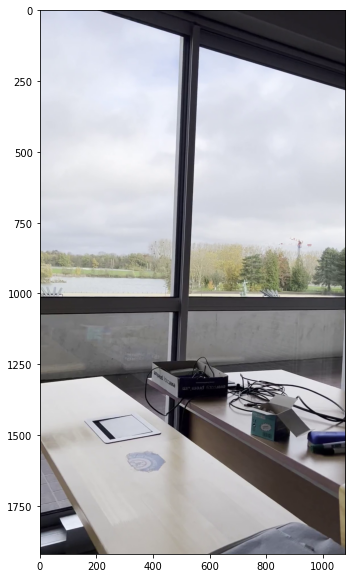

In [289]:
img=copy.deepcopy(video[1])

#they interchanged R and B so:

out=np.zeros(video[0].shape)

out[:,:,0]=copy.deepcopy(img[:,:,2]) #--->Here
out[:,:,1]=copy.deepcopy(img[:,:,1])
out[:,:,2]=copy.deepcopy(img[:,:,0]) #--->Here
out=out.astype(int) #IMPORTANT

plt.figure(figsize=(10,10))
plt.imshow(out)

#need to do it on all the images of the video

In [241]:
#find a "green enough" spot

img=video[50]
i,j=0,0
g_point=img[i,j,:]
print(g_point, i, j)
while (g_point[1]<100) or (g_point[0]>100) or (g_point[2]>100): #need a better selection criteria! 
#(check the color of the green blanket we will use)

    i=random.randint(0, img.shape[0]-1)
    j=random.randint(0, img.shape[1]-1)
    g_point=img[i,j,:]
    
print(g_point, i, j)

[102 114 124] 0 0
[ 95 103  93] 977 393


In [356]:
#growing region
#i,j point of interest (which starts the growing region)
#T the threshold

def GR(img, i, j, T):
    
    (I,J,colors)=(img.shape)
    new_region=[[i,j]]
    treated_region=[]
    total_region=[[i,j]]
    
    mu_R, mu_G, mu_B=img[i,j,0], img[i,j,1], img[i,j,2]
    neighb=[-1,0,1]
    
    while new_region!=[]:
        #print("new", new_region)
        #print("treated", treated_region)
        #print("total", total_region)
        print(len(total_region)/(I*J))
 
        #everytime reevaluate mu of total_R
        mu_R, mu_G, mu_B=0,0,0
        for k in range(len(total_region)):
            pt=total_region[k]
            mu_R+=img[pt[0], pt[1], 0]
            mu_G+=img[pt[0], pt[1], 1]
            mu_B+=img[pt[0], pt[1], 2]
        mu_R/=len(total_region)
        mu_G/=len(total_region)
        mu_B/=len(total_region)
        
        #can also compute sigma (if we decide to use it for the thresholding criteria)
        
        R=copy.deepcopy(new_region)
        for pt in R: #treat all the points newly added to the region
            i,j=pt[0], pt[1]
            for add_i in neighb:
                for add_j in neighb:
                    newi=i+add_i
                    newj=j+add_j
                    if newi!=i or newj!=j:
                        if (newi>=0) and (newj>=0) and (newi<I) and (newj<J) and ([newi, newj] not in total_region):
                            if np.abs(img[newi,newj,0]-mu_R)<T and np.abs(img[newi,newj,1]-mu_G)<T and np.abs(img[newi,newj,2]-mu_B)<T:
                                new_region.append([newi,newj])
                                total_region.append([newi, newj])

            treated_region.append(pt)
            new_region.remove(pt)
            #print(treated_region)
            
    return treated_region

In [357]:
test2=np.zeros((5,5,3))

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


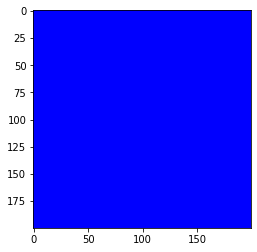

In [359]:
matrix_test=np.zeros((200,200,3))
for i in range(200):
    for j in range(200):
        for k in range(3):
            if k==2:
                matrix_test[i,j,k]=100
                
plt.imshow(matrix_test)

In [ ]:
new_region=GR(out, 1750,400 , 10)
new_region

4.822530864197531e-07
4.340277777777778e-06
1.2056327160493826e-05
2.36304012345679e-05
3.90625e-05
5.835262345679012e-05
8.150077160493827e-05
0.00010850694444444444
0.00013937114197530863
0.00017409336419753086
0.0002126736111111111
0.0002551118827160494
0.00030140817901234566
0.0003515625
0.00040557484567901235
0.0004634452160493827
0.0005251736111111111
0.0005907600308641976
0.000660204475308642
0.0007335069444444444
0.0008106674382716049
0.0008916859567901235
0.0009765625
0.0010652970679012345
0.0011578896604938272
0.0012543402777777778
0.0013546489197530864
0.001458815586419753
0.0015668402777777777
0.0016787229938271604
0.0017944637345679011
0.0019140625
0.0020375192901234567
0.0021619405864197533
0.0022882908950617284
0.0024170524691358025
0.002548225308641975
0.0026822916666666666
0.002813946759259259
0.0029484953703703704
0.0030864197530864196
0.0032262731481481483
0.0033685378086419754
0.003513213734567901
0.003660300925925926
0.0038112461419753086
0.003962191358024691
0.004

0.030279224537037037
0.030296103395061728
0.03031394675925926
0.030326003086419754
0.03033323688271605
0.030340952932098767
0.03034866898148148
0.030356385030864196
0.030364583333333334
0.03037326388888889
0.030381462191358025
0.03039014274691358
0.030399787808641974
0.03040991512345679
0.030420042438271604
0.03043016975308642
0.030439814814814815
0.03044994212962963
0.030459587191358026
0.030469714506172838
0.030479841820987653
0.030490451388888888
0.03050202546296296
0.030514081790123458
0.03052758487654321
0.030540605709876545
0.030552662037037038
0.03056471836419753
0.030577256944444443
0.03058979552469136
0.03060281635802469
0.030616319444444446
0.030630304783950617
0.03064477237654321
0.030659239969135804
0.030674189814814814
0.030689621913580246
0.0307055362654321
0.03072241512345679
0.030737847222222222
0.030752797067901235
0.030767746913580248
0.0307836612654321
0.03080054012345679
0.0308179012345679
0.03083622685185185
0.030855516975308642
0.03087480709876543
0.03089457947530

In [317]:
def remover(image,R):
    img=copy.deepcopy(image)
    for pt in range(len(R)):
        for color in range(3):
            img[R[pt][0], R[pt][1], color]=0
    return img

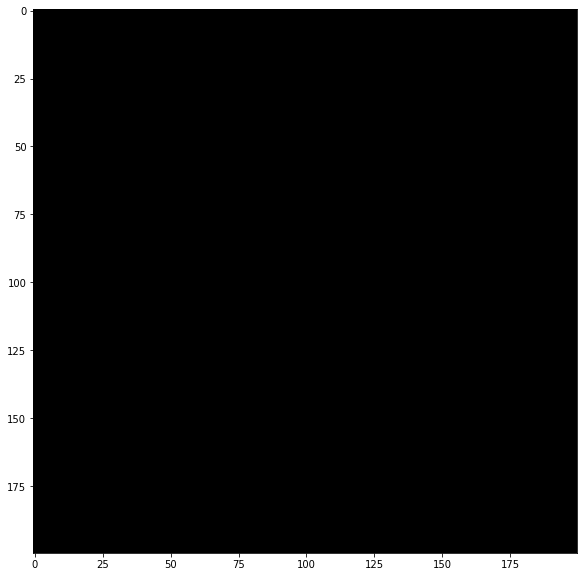

In [361]:
plt.figure(figsize=(10,10))
plt.imshow(remover(matrix_test, new_region))

In [245]:
np.abs(2-3)

1